<a href="https://colab.research.google.com/github/etgcrog/rede-nerural/blob/master/emotion_with_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
%tensorflow_version 2.x
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [58]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [59]:
from google.colab import drive
drive.mount('./cv2')

Drive already mounted at ./cv2; to attempt to forcibly remount, call drive.mount("./cv2", force_remount=True).


In [60]:
face_detector = cv2.CascadeClassifier("/content/cv2/MyDrive/Colab Notebooks/data_emotion/haarcascade_frontalface_default.xml")
emotion_detector = load_model("/content/cv2/MyDrive/Colab Notebooks/data_emotion/modelo_01_expressoes.h5", compile=False)
labels = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

In [61]:
VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def tirar_foto(filename='photo.jpg', quality=2, size=(400,300)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

In [62]:
# Clique na imagem da webcam para tirar uma foto
imagem = tirar_foto() 
# Inverte a ordem dos canais (utilizar caso a imagem capturada fique com cores invertidas)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) 
cv2.imwrite("eu.jpg",imagem)

True

In [63]:
original = imagem.copy()
faces = face_detector.detectMultiScale(original,scaleFactor=1.1,minNeighbors=3,minSize=(20,20))
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

1/1 [==============================] - 0s 183ms/step
[8.8183112e-02 3.3970713e-04 9.6027859e-02 1.3126685e-02 1.4777330e-01
 5.0999909e-03 6.4944929e-01]


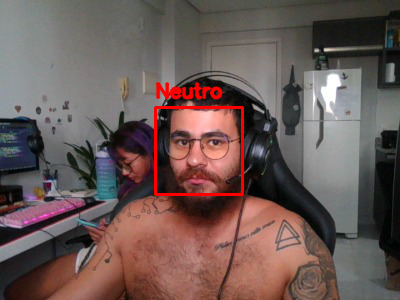

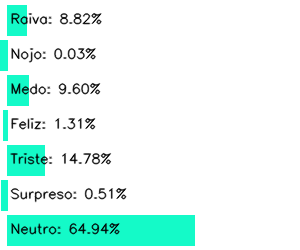

In [64]:
original = imagem.copy()
faces = face_detector.detectMultiScale(original,scaleFactor=1.1,minNeighbors=3,minSize=(20,20))
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
 
if len(faces) > 0:
    for (fX, fY, fW, fH) in faces:
      roi = cinza[fY:fY + fH, fX:fX + fW]
      roi = cv2.resize(roi, (48, 48))
      roi = roi.astype("float") / 255.0
      roi = img_to_array(roi)
      roi = np.expand_dims(roi, axis=0)
      preds = emotion_detector.predict(roi)[0]
      print(preds)
      emotion_probability = np.max(preds)
      label = labels[preds.argmax()]
      cv2.putText(original, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2, cv2.LINE_AA)
      cv2.rectangle(original, (fX, fY), (fX + fW, fY + fH),(0, 0, 255), 2)
else:
    print('Nenhuma face detectada')


probabilidades = np.ones((250, 300, 3), dtype="uint8") * 255
# Mostra gráfico apenas se detectou uma face
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(labels, preds)):
      # Nome das emoções
      text = "{}: {:.2f}%".format(emotion, prob * 100)
      w = int(prob * 300)
      cv2.rectangle(probabilidades, (7, (i * 35) + 5),
      (w, (i * 35) + 35), (200, 250, 20), -1)
      cv2.putText(probabilidades, text, (10, (i * 35) + 23),
      cv2.FONT_HERSHEY_SIMPLEX, 0.45,
      (0, 0, 0), 1, cv2.LINE_AA)
 
  cv2_imshow(original)
  cv2_imshow(probabilidades)